# Imports

In [4]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [5]:
n = 5
label_name = "stat1"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [6]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [7]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.3609525561332703
Epoch 1, Loss 1.3734713792800903
Epoch 2, Loss 1.3541046380996704
Epoch 3, Loss 1.3477864861488342
Epoch 4, Loss 1.3435903787612915
Epoch 5, Loss 1.3188248872756958
Epoch 6, Loss 1.293797254562378
Epoch 7, Loss 1.3318974375724792
Epoch 8, Loss 1.3031214475631714
Epoch 9, Loss 1.294425129890442
Epoch 10, Loss 1.2928478717803955
Epoch 11, Loss 1.275838553905487
Epoch 12, Loss 1.2715381383895874
Epoch 13, Loss 1.2558367848396301
Epoch 14, Loss 1.210513174533844
Epoch 15, Loss 1.2349089980125427
Epoch 16, Loss 1.225087583065033
Epoch 17, Loss 1.2157446146011353
Epoch 18, Loss 1.1912152171134949
Epoch 19, Loss 1.184203326702118
Epoch 20, Loss 1.1821335554122925
Epoch 21, Loss 1.1857558488845825
Epoch 22, Loss 1.1761122941970825
Epoch 23, Loss 1.16211998462677
Epoch 24, Loss 1.16447114944458
Epoch 25, Loss 1.1358574032783508
Epoch 26, Loss 1.1412487030029297
Epoch 27, Loss 1.136708915233612
Epoch 28, Loss 1.1267414093017578
Epoch 29, Loss 1.1090646386146545
E

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

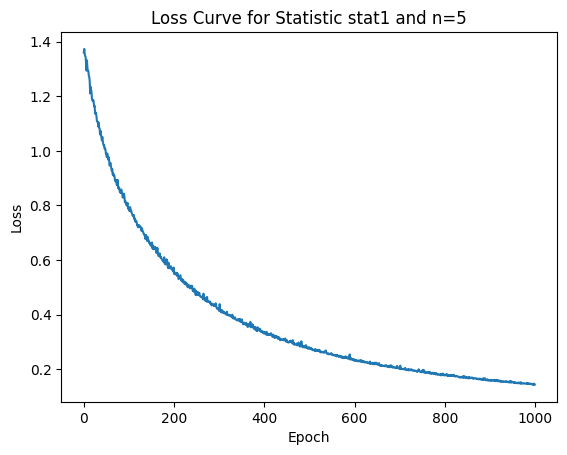

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot loss function
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Loss Curve for Statistic {label_name} and n={n}")
plt.show()
plt.savefig(f"figures/loss_curve_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


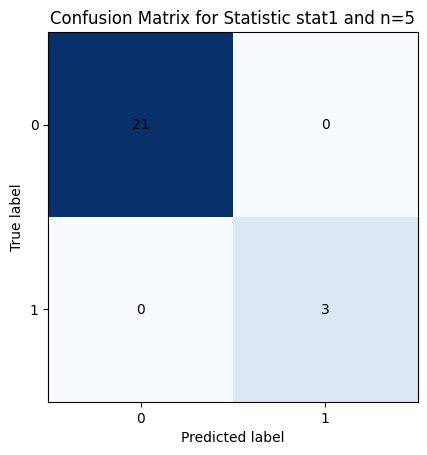

In [9]:
confusion_matrix = evaluate_model(model, test_dataset)
confusion_matrix.print_accuracy()
confusion_matrix.plot(title=f"Confusion Matrix for Statistic {label_name} and n={n}")

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

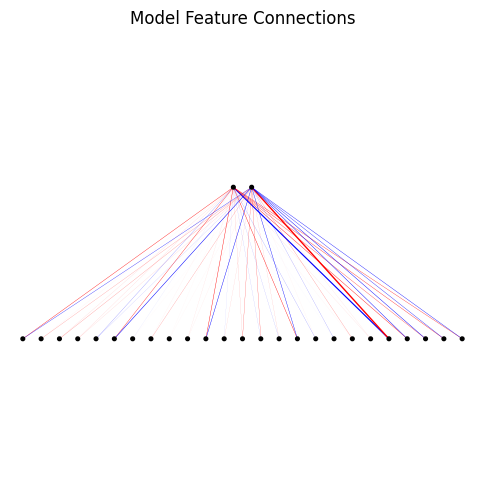

Layer 1


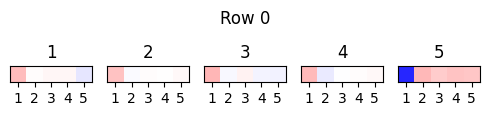

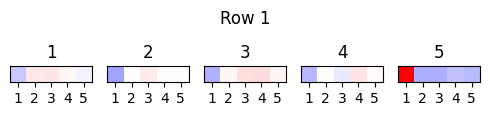

In [10]:
model.plot_connections()

for i in range(len(layers)):
    print(f"Layer {i + 1}")
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)